In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from skopt.space import Integer, Categorical, Real
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
df = pd.read_csv('highUtilizationPredictionV2wco.csv') 

In [9]:
df.head()

,race,age,patient_id,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,ELIX7,...,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12,HighUtilizationY2,claimCount
0,B,71,PAT136597,0,0,0,0,0,1,0,...,0,1,4,2,1,3,1,1,1,160
1,A,86,PAT119838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2,W,70,PAT11289,1,0,0,0,0,0,0,...,4,2,2,0,6,2,1,0,0,52
3,W,75,PAT178745,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,15
4,W,77,PAT50922,0,0,0,0,1,0,0,...,4,3,4,4,4,3,4,4,0,66


In [10]:
df.columns

Index(['race', 'age', 'patient_id', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',
       'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11',
       'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18',
       'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25',
       'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5',
       'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14',
       'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23',
       'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5',
       'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10',
       'drugs_m10-11', 'drugs_m11-12', 'HighUtilizationY2', 'claimCount'],
      dtype='object')

In [11]:
df1=pd.get_dummies(df['race'])

In [12]:
df=pd.concat([df,df1],axis=1)

In [13]:
Y = df['HighUtilizationY2']

In [14]:
features = list(df.columns)

In [15]:
features.remove('race')

In [16]:
features.remove('HighUtilizationY2')
features.remove('patient_id')
features.remove('claimCount')

In [17]:
X  = df[features]

In [18]:
X.shape

(113024, 71)

In [19]:
Y.shape

(113024,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# 1. Using the high utilization data, optimize hyperparameters for Random Forest, Logistic Regression, and another selected learning method. For each of the method, search through values of at least three different hyperparameters.

# 1.1 LOGISTIC REGRESSION HYPERPARAMETER TUNING

In [21]:
space  = [Categorical(['l1','l2'], name='penalty'),
          Real(.1, 1.0, name='C'),
          Categorical(['liblinear','lbfgs'], name='solver'),
          Categorical(['balanced','None',], name='class_weight')]

In [22]:
@use_named_args(space)
def objective(**params):
    lr = LogisticRegression()
    return -np.mean(cross_val_score(lr, X_train, y_train, cv=5, n_jobs=-1, scoring='roc_auc'))

In [23]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)
"Best score=%.4f" % res_gp.fun

C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


'Best score=-0.8231'

In [24]:
print("BEST PENALTY - ",res_gp.x[0])
print("BEST VALUE OF C - ",res_gp.x[1])
print("BEST SOLVER - ",res_gp.x[2])
print("BEST CLASS WEIGHT - ",res_gp.x[3])

BEST PENALTY -  l2
BEST VALUE OF C -  0.8598391737229157
BEST SOLVER -  lbfgs
BEST CLASS WEIGHT -  None


# LOGISTIC REGRESSION DEFAULT VALUE

In [26]:
log = LogisticRegression()
log.fit(X_train,y_train)
probs = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc(fpr,tpr)

0.813383248614135

HYPERPARAMETER AUC = 0.8231 <br>
DEFAULT AUC = 0.813383248614135

# 1.2 RANDOM FOREST HYPERPARAMETER TUNING

In [27]:
space = [Integer(100, 500, name='n_estimators'),
         Integer(2, 71, name='max_features'),
         Categorical(['gini','entropy'], name='criterion'),
         Categorical(['balanced','balanced_subsample'], name='class_weight')]

In [28]:
@use_named_args(space)
def objective(**params):
    rf = RandomForestClassifier(**params)
    return -np.mean(cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring='roc_auc'))

In [29]:
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)
"Best score=%.4f" % res_gp.fun

C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\saite\AppData\Local\Continuum\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: Th

'Best score=-0.8065'

In [47]:
"Best score=%.4f" % -(res_gp.fun)

'Best score=0.8065'

In [31]:
print("BEST n_estimators - ",res_gp.x[0])
print("BEST max_features - ",res_gp.x[1])
print("BEST criterion - ",res_gp.x[2])
print("BEST CLASS WEIGHT - ",res_gp.x[3])

BEST n_estimators -  499
BEST max_features -  3
BEST criterion -  gini
BEST CLASS WEIGHT -  balanced


# DEFAULT VALUE

In [32]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)
probs = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc(fpr,tpr)

0.739286924622513

HYPERPARAMETER AUC = 0.8065 <BR>
DEFAULT AUC = 0.739286924622513

# 1.3 DECISION TREE

In [33]:
space = [Categorical(["gini", "entropy"], name='criterion'),
         Categorical(["best", "random"], name='splitter'),
         Categorical(['balanced','None'], name='class_weight')]

In [34]:
@use_named_args(space)
def objective(**params):
    DT = DecisionTreeClassifier()
    return -np.mean(cross_val_score(DT, X_train, y_train, cv=5, n_jobs=-1, scoring='roc_auc'))

In [35]:
dt_gp = gp_minimize(objective, space, n_calls=10, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 5.7945
Function value obtained: -0.5907
Current minimum: -0.5907
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.2616
Function value obtained: -0.5930
Current minimum: -0.5930
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.2766
Function value obtained: -0.5906
Current minimum: -0.5930
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 4.6605
Function value obtained: -0.5903
Current minimum: -0.5930
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 4.5817
Function value obtained: -0.5927
Current minimum: -0.5930
Iteration No: 6 started. 

In [37]:
print("BEST  criterion - ",dt_gp.x[0])
print("BEST splitter - ",dt_gp.x[1])
print("BEST class_weight - ",dt_gp.x[2])

BEST  criterion -  gini
BEST splitter -  best
BEST class_weight -  None


# DEFALUT VALUE

In [38]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
probs = DT.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc(fpr,tpr)

0.5838590211516403

HYPERPARAMETER AUC = 0.5944 <BR>
DEFAULT AUC = 0.5838590211516403

# 2. Plot model AUC and accuracy on training and testing data for different values of lambda (C) in L1 regularized logistic regression.

In [39]:
params={"C": [0.05,.1,.15,.2,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95,1.0]}

In [40]:
accuracy_test = []
au_test = []
accuracy_train = []
au_train = []
pen = []
for c in params["C"]:
    log = LogisticRegression(C=c,penalty='l1')
    pen.append(c)
    log.fit(X_train,y_train)
    probs = log.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    au_test.append(a)
    clas = log.predict(X_test) 
    acc = accuracy_score(y_test, clas)
    accuracy_test.append(acc)
    
    ################### TRAIN #######################
    probs = log.predict_proba(X_train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probs)
    a=auc(fpr,tpr)
    au_train.append(a)
    clas = log.predict(X_train) 
    acc = accuracy_score(y_train, clas)
    accuracy_train.append(acc)

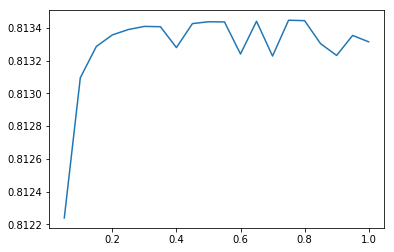

In [41]:
plt.plot(pen,au_test)

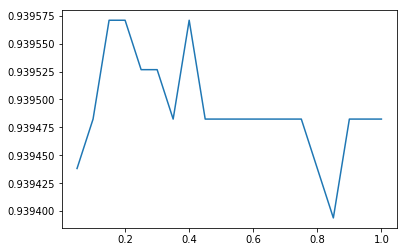

In [42]:
plt.plot(pen,accuracy_test)

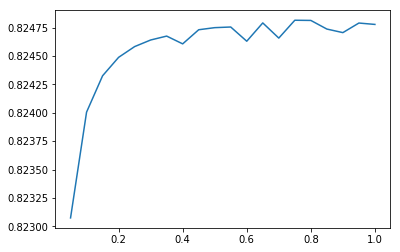

In [43]:
plt.plot(pen,au_train)

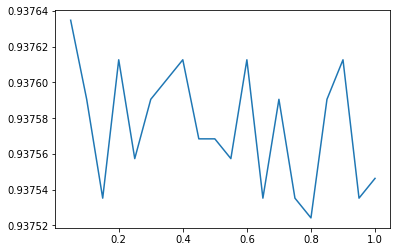

In [44]:
plt.plot(pen,accuracy_train)

# DEFAULT VAUE

In [50]:
log = LogisticRegression()
log.fit(X_train,y_train)
probs = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
a=auc(fpr,tpr)
clas = log.predict(X_test) 
acc = accuracy_score(y_test, clas)

print("TEST ACCURACY  =", acc)
print("TEST AUC       =", a)
    
################### TRAIN #######################
probs = log.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, probs)
a=auc(fpr,tpr)
clas = log.predict(X_train) 
acc = accuracy_score(y_train, clas)

print("TRAIN ACCURACY =", acc)
print("TRAIN AUC      =", a)

TEST ACCURACY  = 0.9393939393939394
TEST AUC       = 0.813383248614135
TRAIN ACCURACY = 0.9375684314137516
TRAIN AUC      = 0.8248000852519342
